# KNN

In [107]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import joblib

In [94]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [95]:
x, y = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(x.shape)
print(y.shape)
print(f"shapes of x_train and x_test  {x_train.shape} , {x_test.shape}")
print(f"shapes of y_train and y_test  {y_train.shape} , {y_test.shape}")

(1797, 64)
(1797,)
shapes of x_train and x_test  (1437, 64) , (360, 64)
shapes of y_train and y_test  (1437,) , (360,)


# Fit

default neighbours = 5

In [96]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

accuracy :

In [97]:
print(f"train dataset accuracy : {clf.score(x_train,y_train)}")
print(f"test dataset accuracy : {clf.score(x_test,y_test)}")

train dataset accuracy : 0.9909533750869868
test dataset accuracy : 0.9861111111111112


After scaling :

In [98]:
scaler = Normalizer()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [99]:
clf_scale = KNeighborsClassifier()
clf_scale.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [100]:
print(f"train dataset accuracy : {clf_scale.score(x_train_scale,y_train)}")
print(f"test dataset accuracy : {clf_scale.score(x_test_scale,y_test)}")

train dataset accuracy : 0.9909533750869868
test dataset accuracy : 0.9888888888888889


Searching for best N :

In [101]:
train = []
test = []

for i in range(1,10):
    clf_test = KNeighborsClassifier(n_neighbors=i)
    clf_test.fit(x_train_scale,y_train)
    train.append(clf_test.score(x_train_scale,y_train))
    test.append(clf_test.score(x_test_scale,y_test))
    
print(train.index(max(train)))
print(test.index(max(test)))

print(train)
print(test)
    

0
3
[1.0, 0.9902574808629089, 0.9930410577592206, 0.9923451635351427, 0.9909533750869868, 0.988865692414753, 0.9895615866388309, 0.9860821155184412, 0.9874739039665971]
[0.9861111111111112, 0.9777777777777777, 0.9888888888888889, 0.9916666666666667, 0.9888888888888889, 0.9833333333333333, 0.9861111111111112, 0.9777777777777777, 0.9777777777777777]


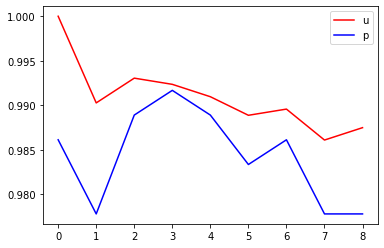

In [102]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.legend("upper right")
plt.show()

In [103]:
clf_main = KNeighborsClassifier(n_neighbors=4)
clf_main.fit(x_train_scale,y_train)

print(f"train dataset accuracy : {clf_main.score(x_train_scale,y_train)}")
print(f"test dataset accuracy : {clf_main.score(x_test_scale,y_test)}")

train dataset accuracy : 0.9923451635351427
test dataset accuracy : 0.9916666666666667


# Prediction

In [105]:
y_pred = clf_main.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  1]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 31]]


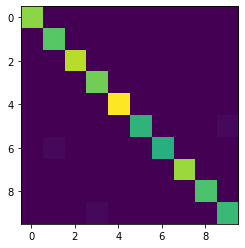

In [106]:
plt.imshow(cm)
plt.show()

# Save 

In [108]:
joblib.dump(clf_main,"KNN_Model.pkl")

['KNN_Model.pkl']